# Wilkommen zur Datenanalyse "Dota 2 Matches"
#### Maren Sudahl, Robin Holzwarth, Vitalij Degraf, Yvonne Maul, Adrian Grünther
## Mögliche Fragestellungen
Kann man auf den Daten die vor Spielbeginn verfügbar sind den Ausgang des Spiels vorhersagen? (Auf Basis der Erfolgschance der Champions)

Ab welchem Zeitpunkt, bzw. unter welchen Bedingungen in einem Spiel ist der Ausgang sicher? (Teamgold und Tode bzw. Tower)

Wie wirkt sich das Verhalten der Spieler in dem Chat auf das Spielergebnis aus bzw. der Spielverlauf auf das Chatverhalten aus?

Gibt es Helden die erfolgreichen sind als andere? Welchen Einfluss hat die Zeit auf die Erfolgschancen
?

## Analyse und Testdaten
Wir möchten mit Analyse und Testdaten arbeiten. 
Analysedaten: 5000 Spiele
Testdaten: 45000 Spiele


## Import der nötigen Bibliotheken

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

## Laden der Daten zu Analysezwecken 
Namenskonvention: df_(name_file) 

df_(name_file) = pd.read_csv('data/(name_file).csv',nrows = anzahl_daten, memory_map=True)

In [42]:
df_players = pd.read_csv('data/players.csv', memory_map=True)
df_player_ratings_50000 = pd.read_csv('data/player_ratings.csv', memory_map=True, nrows=50000)
df_match_50000 = pd.read_csv('Data/match.csv' ,memory_map=True, nrows=50000)
df_match_500 = pd.read_csv('Data/match.csv' ,memory_map=True, nrows=500)
# df_chat = pd.read_csv('data/dota-2-matches/chat.csv', memory_map=True)

In [43]:
df_player_ratings_50000["winrate"] = df_player_ratings_50000["total_wins"]/df_player_ratings_50000["total_matches"]

In [44]:
pd.cut(df_player_ratings_50000['total_matches'], bins=[0,10,100,300,1000], labels=['blutiger Anfänger', 'Gelegenheitsspieler', 'Süchtig', 'Semi Pro']).value_counts()

blutiger Anfänger      37023
Gelegenheitsspieler    12442
Süchtig                  523
Semi Pro                  12
Name: total_matches, dtype: int64

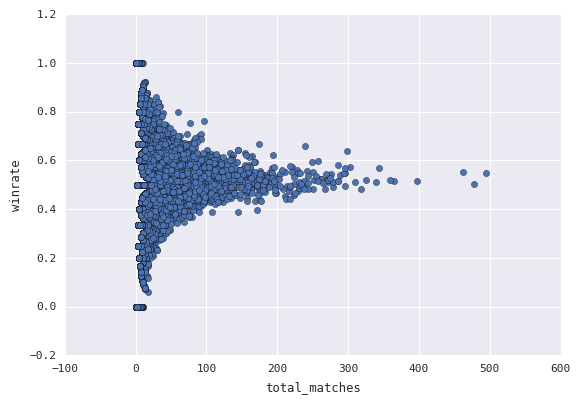

In [46]:
df_player_ratings_50000.plot.scatter(x="total_matches",y="winrate")

In [36]:
df_player_ratings_50000["player_cat"] = pd.cut(df_player_ratings_50000['total_matches'], bins=5)

In [37]:
df_player_ratings_50000.shape


(834226, 7)

In [38]:
df_player_ratings_50000.groupby("player_cat").size()

player_cat
(-3314.07, 663015]    834225
(663015, 1326029]          0
(1326029, 1989043]         0
(1989043, 2652057]         0
(2652057, 3315071]         1
dtype: int64

In [39]:
df_player_ratings_50000.groupby("player_cat").winrate.mean()

player_cat
(-3314.07, 663015]    0.484083
(663015, 1326029]          NaN
(1326029, 1989043]         NaN
(1989043, 2652057]         NaN
(2652057, 3315071]    0.485178
Name: winrate, dtype: float64

In [50]:
df_match_50000["radiant_win"] = df_match_50000.radiant_win.astype(int)
mat = df_match_50000.merge(df_match_50000,on='match_id').merge(df_players[df_players["player_slot"]<6],on='match_id')
corrmat = mat.corr()
mat["hero_id"]

0          86
1          51
2          83
3          11
4          67
5           7
6          82
7          71
8          39
9          21
10         51
11        109
12          9
13         41
14         27
15         50
16         44
17         32
18         26
19         39
20          8
21         39
22         55
23         87
24         69
25         32
26         27
27         67
28        106
29         71
         ... 
249970     44
249971     90
249972     20
249973     97
249974    106
249975     73
249976     86
249977     21
249978     20
249979     14
249980     93
249981     74
249982    100
249983     32
249984     85
249985    100
249986     68
249987     75
249988     39
249989     44
249990     56
249991     50
249992      2
249993     72
249994     30
249995     94
249996     19
249997     68
249998     35
249999     21
Name: hero_id, dtype: int64

In [51]:
corrmat.radiant_win_y.round(3).sort_values(ascending=False)

radiant_win_y                        1.000
radiant_win_x                        1.000
tower_status_radiant_x               0.969
tower_status_radiant_y               0.969
gold_destroying_structure            0.887
barracks_status_radiant_x            0.873
barracks_status_radiant_y            0.873
gold                                 0.493
tower_damage                         0.465
gold_per_min                         0.464
gold_death                           0.378
xp_per_min                           0.344
assists                              0.334
gold_spent                           0.293
kills                                0.262
xp_hero                              0.208
level                                0.195
unit_order_train_ability             0.183
hero_damage                          0.171
unit_order_purchase_item             0.136
item_5                               0.112
item_4                               0.105
item_3                               0.091
hero_healin